In [169]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import OrderedDict
from collections import defaultdict

import dimod.generators as dg
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

In [271]:
def to_base_ten(b_list):
    result = 0
    for i in range(len(b_list)):
        result += b_list[i] * 2**i
    return result

def extract_ab(sample, num_bits1, num_bits2):
    a = b = 1
    for i in range(1, num_bits1):
        a += sample["a" + str(i)] * 2**i
    for i in range(1, num_bits2):
        b += sample["b" + str(i)] * 2**i
    return a, b

In [267]:
P = 21
num_bits1 = 5
num_bits2 = 5
bqm = dg.multiplication_circuit(num_bits1, num_bits2)
print("BQM has {} variables: \n\t{}".format(len(bqm.variables), list(bqm.variables)))

p_vars = [var for var in list(bqm.variables) if "p" in var]
print(p_vars)
#p_vars = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5']

# Convert P from decimal to binary
#fixed_variables = dict(zip(reversed(p_vars), "{:06b}".format(P)))
#fixed_variables = {var: int(x) for(var, x) in fixed_variables.items()}
fixed_variables = np.zeros(len(p_vars))
for i in range(len(p_vars)):
    fixed_variables[i] = math.floor(P / 2**i ) % 2

# Fix product variables
for i in range(len(p_vars)):
    bqm.fix_variable(p_vars[i], fixed_variables[i])
bqm.fix_variable("a0", 1)
bqm.fix_variable("b0", 1)
    
print("BQM has {} non-fixed variables: \n\t{}".format(len(bqm.variables), list(bqm.variables)))

BQM has 75 variables: 
	['a0', 'b0', 'p0', 'b1', 'and0,1', 'b2', 'and0,2', 'b3', 'and0,3', 'b4', 'and0,4', 'a1', 'and1,0', 'p1', 'carry1,0', 'and1,1', 'sum1,1', 'carry1,1', 'and1,2', 'sum1,2', 'carry1,2', 'and1,3', 'sum1,3', 'carry1,3', 'and1,4', 'sum1,4', 'carry1,4', 'a2', 'and2,0', 'p2', 'carry2,0', 'and2,1', 'sum2,1', 'carry2,1', 'and2,2', 'sum2,2', 'carry2,2', 'and2,3', 'sum2,3', 'carry2,3', 'and2,4', 'sum2,4', 'carry2,4', 'a3', 'and3,0', 'p3', 'carry3,0', 'and3,1', 'sum3,1', 'carry3,1', 'and3,2', 'sum3,2', 'carry3,2', 'and3,3', 'sum3,3', 'carry3,3', 'and3,4', 'sum3,4', 'carry3,4', 'a4', 'and4,0', 'p4', 'carry4,0', 'and4,1', 'p5', 'carry4,1', 'and4,2', 'p6', 'carry4,2', 'and4,3', 'p7', 'carry4,3', 'and4,4', 'p8', 'p9']
['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
BQM has 63 non-fixed variables: 
	['b1', 'and0,1', 'b2', 'and0,2', 'b3', 'and0,3', 'b4', 'and0,4', 'a1', 'and1,0', 'carry1,0', 'and1,1', 'sum1,1', 'carry1,1', 'and1,2', 'sum1,2', 'carry1,2', 'and1,3', 'sum1

In [269]:
sampler = DWaveSampler()
print("QPU {} was selected.".format(sampler.solver.name))
embedding_sampler = EmbeddingComposite(sampler)
sampleset = embedding_sampler.sample(bqm, num_reads=1000, label="Factorization", annealing_time=500)

QPU Advantage_system4.1 was selected.


0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], 13., 1, 0.        ),
           ([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], 13., 1, 0.        ),
           ([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1],  9., 1, 0.01587302),
           ([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], 11., 1, 0.01587302),
           ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

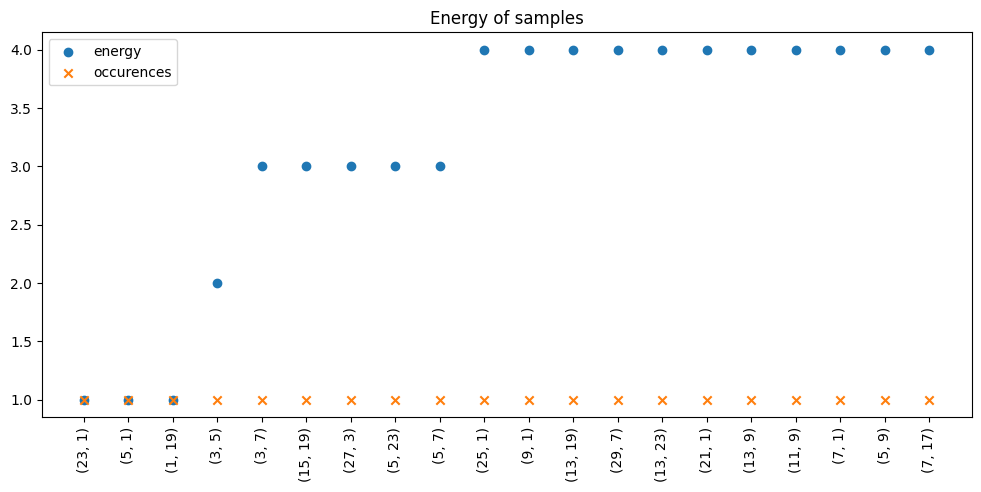

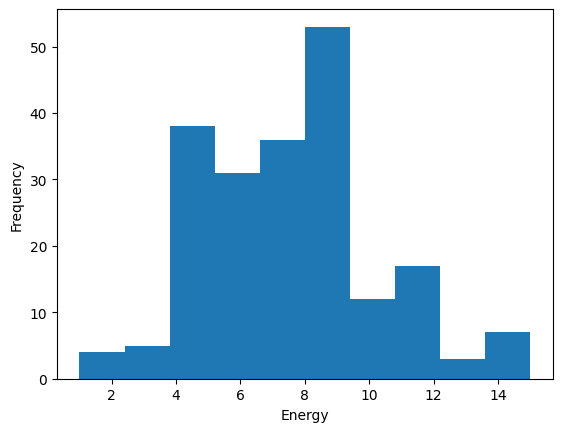

In [273]:
sample = sampleset.first.sample

def response_to_dict(sampleset):
    results_dict = OrderedDict()

    for sample, energy, num in sampleset.data(['sample', 'energy', 'num_occurrences']):
        a, b = extract_ab(sample, num_bits1, num_bits2)
        if (a, b) not in results_dict:
            results_dict[(a, b)] = [round(energy, 2), num]
    return results_dict

def energy_of(results):
    x_range = [str(x) for x in results.keys()]

    plt.figure(figsize=(12, 5))
    ax = plt.gca()
    ax.set_title("Energy of samples")
    values = np.array(list(results.values()))
    #Plot the lowest few energy solutions
    ax.scatter(x_range[:20], values[:20,0], label='energy')
    ax.scatter(x_range[:20], values[:20,1], label='occurences', marker='x')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

    plt.figure()
    plt.hist(values[:,0], weights=values[:,1])
    plt.xlabel("Energy")
    plt.ylabel("Frequency")
    plt.show()

results = response_to_dict(sampleset)
print("First 5 solutions for ab = {}:".format(P))
for i in range(5):
    print(list(results.keys())[i])

print(sampleset.data)
energy_of(results)

In [275]:
#Implement Jiang et al (modified multiplication table method)
class Term:
    def __init__(self, coeff, string):
        self.c = coeff
        self.s = string

    def __str__(self):
        return str(self.c) + "*" + self.s

class Sq_Term:
    def __init__(self, coeff, string1, string2):
        self.c = coeff
        self.s1 = string1
        self.s2 = string2

    def __str__(self):
        return str(self.c) + "*" + self.s1 + "*" + self.s2

'''def print_2d_term_arr(arr):
    char_arr = [[str(x) for x in arr[i,:]] for i in range(len(arr))]
    print(np.flip(np.array(char_arr), axis=1))'''

def print_columns(columns, prefix="col"):
    #char_arr = [[str(x) for x in mult_table[i][:]] for i in range(len(mult_table))]
    #print(np.flip(np.array(char_arr), axis=1))
    num_cols = len(columns)
    for i in range(num_cols):
        temp = ""
        for j in range(len(columns[i])):
            temp += " + " + str(columns[i][j])
        print(prefix + str(i) + ":" + temp)

#r = 143
r = 9
num_bits = 3 #Including the LSB that we assume to be one.
num_cols = num_bits*2
block_size = 2
columns = [ [] for i in range(num_cols)] #Initialize lists that contain all the variables in each column
#mult_table = np.zeros((num_bits, num_cols), dtype='object')
#for i in range(num_bits):
#    for j in range(num_cols):
#        mult_table[i][j] = "-"

#Make binary multiplication table (not yet the carry bits)
for i in range(num_bits):
    for j in range(num_bits):
        if(j == 0):
            p_part = ""
        else:
            p_part = "p" + str(j)
        if(i == 0):
            q_part = ""
        else:
            q_part = "q" + str(i)
        
        if(i != 0 and j != 0):
            #We can do the order reduction replacement in advance
            columns[i+j].append(Term(1, "t" + str(j) + "_" + str(i) ))
        else:
            columns[i+j].append(Term(1, p_part + q_part))
        #mult_table[i][i+j] = Term(1, "p" + str(j) + "q" + str(i))

print("Raw columns:")
print_columns(columns)
#print_2d_term_arr(mult_table)


#Now setup blocks; Note that the LSB of the product is already assumed to be one.
#Column 0 is not part of a block. And the last column always makes up the longest block.
indices = range(1, num_cols)
blocks = [ [] for i in range(len(indices) // block_size) ]
rest = len(indices) % block_size
for i in indices[:-rest]:
    blocks[ (i-1) // block_size ].append(i)
if(rest != 0):
    for i in indices[-rest:]:
        blocks[-1].append(i)

print()       
print("Block setup:", blocks)
block_carries = [ 0 for i in range(len(blocks))]

for i in range(len(blocks)):
    max_number = 0
    for j in range(len(blocks[i])):
        max_number += 2**j * len(columns[ blocks[i][j] ])
    block_carries[i] = math.ceil(math.log(max_number, 2)) - len(blocks[i]) + 1
    #print(max_number)

for i in range(len(blocks)-1): #The minus one because we require that the last block does not have carriers, so they shouldn't get added (and also would cause an out of bounds error)
    for j in range(block_carries[i]):
        if(blocks[i][-1] + j + 1 >= len(columns)): #If the last block is big, we might have carry-overs past the number of columns. So, we need to add more columns for this
            columns.append([])
        columns[ blocks[i][-1] + j + 1 ].append(Term(1, "c_" + str(i) + "_" + str(j)))
print("Number of carries for each block:", block_carries)

print()
print("Columns with carry bits:")
print_columns(columns)


#Set the right coefficients and setup the LHS of the block equations
num_blocks = len(blocks)
block_LHS = [ [] for i in range(num_blocks)]
for i in range(num_blocks):
    for j in range(len(blocks[i])):
        #Add the part of the LHS that corresponds with 2**j
        for k in range(len(columns[blocks[i][j]])):
            block_LHS[i].append(columns[blocks[i][j]][k])
            block_LHS[i][-1].c = 2**j
    if(i != num_blocks-1): #The last block should not have its own carriers in its equation
        for j in range(block_carries[i]):
            #Now add the carrier parts
            block_LHS[i].append(Term(-2**(j + len(blocks[i])), "c_" + str(i) + "_" + str(j)))
    r_part = 0
    for j in range(len(blocks[i])):
        #Add the term of the number we want to factorize
        r_index = blocks[i][j]
        r_part_bit = math.floor(r / 2**r_index ) % 2
        r_part += 2**j * r_part_bit
    block_LHS[i].append(Term(-r_part, ""))

print()
print("Block equation LHS:")
print_columns(block_LHS, prefix="block")


#Now square the block LHS and put them together
#To do that, lets put the variables in the following order:
#First p1,2,3..., then q1,2,3... (2 * num_bits - 2)
#Then, t1_1, t1_2, ..., t2_1, t2_2, ... ... ( (num_bits-1)**2 )
#Then the carriers c_0_0, .. .. (dependent on block size)
#We can make a dictionary to keep track of the variable indices in the QUBO

var_ind = {}
counter = 0

for i in range(num_bits):
    var_ind["p" + str(i)] = counter
    counter += 1
for i in range(num_bits):
    var_ind["q" + str(i)] = counter
    counter += 1
for i in range(1, num_bits):
    for j in range(1, num_bits):
        var_ind["t" + str(i) + "_" + str(j)] = counter
        counter += 1
for i in range(num_blocks-1):
    for j in range(block_carries[i]):
        var_ind["c_" + str(i) + "_" + str(j)] = counter
        counter += 1

print()
print(var_ind.keys())
print("Number of variables: ", len(var_ind))

#Now that the dictionary is setup, we can expand the block LHS and immediately pour the results into the QUBO
Q = defaultdict(int)

for i in range(num_blocks): #Loop through each block LHS
    #Loop through all products coming from taking the square
    for j in range(len(block_LHS[i])):
        for k in range(len(block_LHS[i])):
            if(block_LHS[i][j].s == '' and block_LHS[i][k].s == ''):
                continue
            elif(block_LHS[i][j].s == ''):
                ind = var_ind[block_LHS[i][k].s]
                Q[( ind, ind )] += block_LHS[i][j].c * block_LHS[i][k].c
            elif(block_LHS[i][k].s == ''):
                ind = var_ind[block_LHS[i][j].s]
                Q[( ind, ind )] += block_LHS[i][j].c * block_LHS[i][k].c
            else:
                ind_1 = var_ind[block_LHS[i][j].s]
                ind_2 = var_ind[block_LHS[i][k].s]
                Q[tuple(sorted(( ind_1, ind_2 )))] += block_LHS[i][j].c * block_LHS[i][k].c
                
#Finally, add the penalties to couple the t terms with the variables they replaced
#Their relation is like that of an AND gate, so lets borrow that formula
for i in range(1, num_bits):
    for j in range(1, num_bits):
        #z <-> x1 * x2 --> x1*x2 - 2*x1*z -2*x2*z + 3*z
        t_ind = var_ind["t" + str(i) + "_" + str(j)]
        p_ind = var_ind["p" + str(i)]
        q_ind = var_ind["q" + str(j)]
        Q[tuple(sorted((p_ind, q_ind)))] += 1
        Q[tuple(sorted((p_ind, t_ind)))] += -2
        Q[tuple(sorted((q_ind, t_ind)))] += -2
        Q[(t_ind, t_ind)] += 3


#Calculate the lowest energy, for debugging reasons later
energy_low = 0
for i in range(num_blocks):
    energy_low -= block_LHS[i][-1].c**2
print("Lowest energy: " + str(energy_low))

Raw columns:
col0: + 1*
col1: + 1*p1 + 1*q1
col2: + 1*p2 + 1*t1_1 + 1*q2
col3: + 1*t2_1 + 1*t1_2
col4: + 1*t2_2
col5:

Block setup: [[1, 2], [3, 4, 5]]
Number of carries for each block: [2, 0]

Columns with carry bits:
col0: + 1*
col1: + 1*p1 + 1*q1
col2: + 1*p2 + 1*t1_1 + 1*q2
col3: + 1*t2_1 + 1*t1_2 + 1*c_0_0
col4: + 1*t2_2 + 1*c_0_1
col5:

Block equation LHS:
block0: + 1*p1 + 1*q1 + 2*p2 + 2*t1_1 + 2*q2 + -4*c_0_0 + -8*c_0_1 + 0*
block1: + 1*t2_1 + 1*t1_2 + 1*c_0_0 + 2*t2_2 + 2*c_0_1 + -1*

dict_keys(['p0', 'p1', 'p2', 'q0', 'q1', 'q2', 't1_1', 't1_2', 't2_1', 't2_2', 'c_0_0', 'c_0_1'])
Number of variables:  12
Lowest energy: -1


In [276]:
sampler = DWaveSampler()
print("QPU {} was selected.".format(sampler.solver.name))
embedding_sampler = EmbeddingComposite(sampler)
sampleset = embedding_sampler.sample_qubo(Q, num_reads=1000, label="Factorization", annealing_time=500, chain_strength=100)

QPU Advantage_system4.1 was selected.


{'p1': 1, 'p2': 0, 'q1': 1, 'q2': 0, 't1_1': 1, 't1_2': 0, 't2_1': 0, 't2_2': 0, 'c_0_0': 1, 'c_0_1': 0}
First solution: (3, 3), E = -1.0


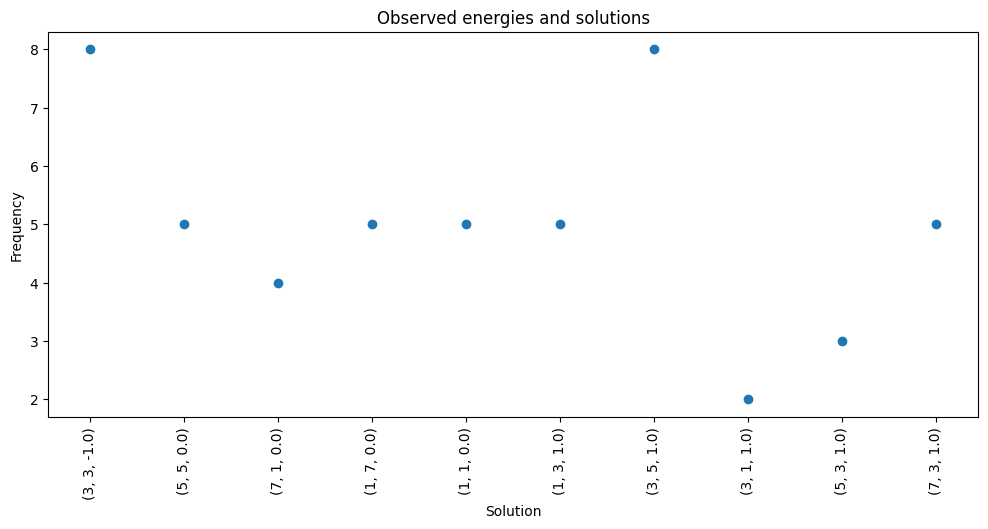

 7.,  6, 0. ),
           ([1, 1, 1, 1, 0, 0, 0, 0, 1, 0],   7.,  5, 0. ),
           ([1, 0, 0, 0, 1, 0, 0, 1, 1, 0],   8.,  5, 0. ),
           ([0, 1, 0, 1, 1, 0, 0, 0, 0, 1],   8.,  3, 0. ),
           ([0, 1, 0, 0, 0, 1, 1, 0, 0, 0],   8.,  3, 0. ),
           ([1, 0, 0, 1, 1, 1, 1, 0, 1, 0],   8.,  3, 0. ),
           ([1, 1, 1, 0, 1, 1, 1, 0, 1, 0],   8.,  3, 0. ),
           ([1, 0, 1, 1, 1, 1, 1, 0, 1, 0],   8.,  3, 0. ),
           ([0, 0, 0, 1, 0, 0, 0, 1, 1, 0],   8.,  2, 0. ),
           ([0, 1, 1, 0, 1, 1, 1, 0, 1, 0],   8.,  1, 0. ),
           ([1, 1, 1, 1, 0, 0, 0, 0, 0, 1],   8.,  2, 0. ),
           ([0, 0, 1, 0, 1, 0, 0, 1, 1, 0],   8.,  4, 0. ),
           ([1, 0, 0, 1, 0, 1, 0, 0, 0, 0],   8.,  2, 0. ),
           ([0, 1, 1, 1, 1, 1, 0, 0, 0, 1],   8.,  1, 0. ),
           ([0, 0, 0, 1, 0, 1, 1, 0, 0, 0],   8.,  1, 0. ),
           ([1, 1, 0, 1, 1, 0, 1, 0, 0, 1],   8.,  2, 0. ),
           ([1, 0, 0, 0, 0, 1, 0, 1, 0, 0],   8.,  2, 0. ),
           ([1, 0, 0, 0, 

In [277]:
def sol_dict(var_dict, sample):
    new_dict = {}
    for i in var_dict.keys():
        if(var_dict[i] in sample):
            new_dict[i] = sample[var_dict[i]]
    return new_dict

sample = sampleset.first.sample

solution = sol_dict(var_ind, sample)
print(solution)

p = 1
q = 1
for i in range(1, num_bits):
    p += solution["p" + str(i)] * 2**i
    q += solution["q" + str(i)] * 2**i

print("First solution: (" + str(p) + ", " + str(q) + "), E = " + str(sampleset.first.energy))

results_dict = {}
for sample, energy, num in sampleset.data(['sample', 'energy', 'num_occurrences']):
    p = 1
    q = 1
    for i in range(1, num_bits):
        p += sample[var_ind["p" + str(i)]] * 2**i
        q += sample[var_ind["q" + str(i)]] * 2**i
    sol = "(" + str(p) + ", " + str(q) + ")"
    results_dict[(p, q, energy)] = num

x_range = [str(x) for x in results_dict.keys()]

plt.figure(figsize=(12, 5))
ax = plt.gca()
ax.set_title("Observed energies and solutions")
values = np.array(list(results_dict.values()))
plt.xticks(rotation=90)
ax.scatter(x_range[:10], values[:10])
#print(values[:,1])
plt.xlabel("Solution")
plt.ylabel("Frequency")
plt.show()
print(sampleset.data)